<a href="https://colab.research.google.com/github/SanjayBukka/deep-learning/blob/main/CNN_implementation_%26_Regularization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

Load and preprocess the dataset

We first load the MNIST dataset, which consists of handwritten digits (0-9).

The images are grayscale and have a resolution of 28x28 pixels.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Normalize the images

To improve training performance, we normalize pixel values to the range [0,1].

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Reshape the images to match CNN input format.

CNNs expect 4D input (batch_size, height, width, channels), so we reshape the data.

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Convert labels to categorical format

Since this is a multi-class classification problem, we use one-hot encoding.

In [5]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Define a basic CNN model.

This model consists of two convolutional layers, each followed by max pooling.

In [6]:
def build_basic_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

Compile and train the basic CNN model

We use Adam optimizer and categorical cross-entropy as the loss function.

In [7]:
basic_cnn = build_basic_cnn()
basic_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
basic_history = basic_cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.9069 - loss: 0.2978 - val_accuracy: 0.9866 - val_loss: 0.0413
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9859 - loss: 0.0469 - val_accuracy: 0.9892 - val_loss: 0.0343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9901 - loss: 0.0323 - val_accuracy: 0.9905 - val_loss: 0.0317
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 32ms/step - accuracy: 0.9938 - loss: 0.0193 - val_accuracy: 0.9904 - val_loss: 0.0311
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9951 - loss: 0.0134 - val_accuracy: 0.9892 - val_loss: 0.0364


Define an improved CNN model with regularization and batch normalization

This model includes L2 regularization, dropout layers, and batch normalization to improve generalization.

In [8]:
def build_improved_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

Compile and train the improved CNN model

We train this enhanced model for 10 epochs.

In [9]:
improved_cnn = build_improved_cnn()
improved_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
improved_history = improved_cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 52ms/step - accuracy: 0.8154 - loss: 0.8938 - val_accuracy: 0.9814 - val_loss: 0.2647
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - accuracy: 0.9574 - loss: 0.3449 - val_accuracy: 0.9865 - val_loss: 0.2166
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 56ms/step - accuracy: 0.9667 - loss: 0.2854 - val_accuracy: 0.9875 - val_loss: 0.2080
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 51ms/step - accuracy: 0.9680 - loss: 0.2780 - val_accuracy: 0.9877 - val_loss: 0.2004
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.9693 - loss: 0.2620 - val_accuracy: 0.9863 - val_loss: 0.2050
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 50ms/step - accuracy: 0.9703 - loss: 0.2575 - val_accuracy: 0.9855 - val_loss: 0.1956
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 153s 56ms/step - accuracy: 0.9699 - loss: 0.2518 - val_accuracy: 0.9878 - val_loss: 0.1941
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 53ms/step - accuracy: 0

Function to plot accuracy and loss curves.

This function helps visualize training progress and compare model performance.

In [10]:
def plot_curves(history, title):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


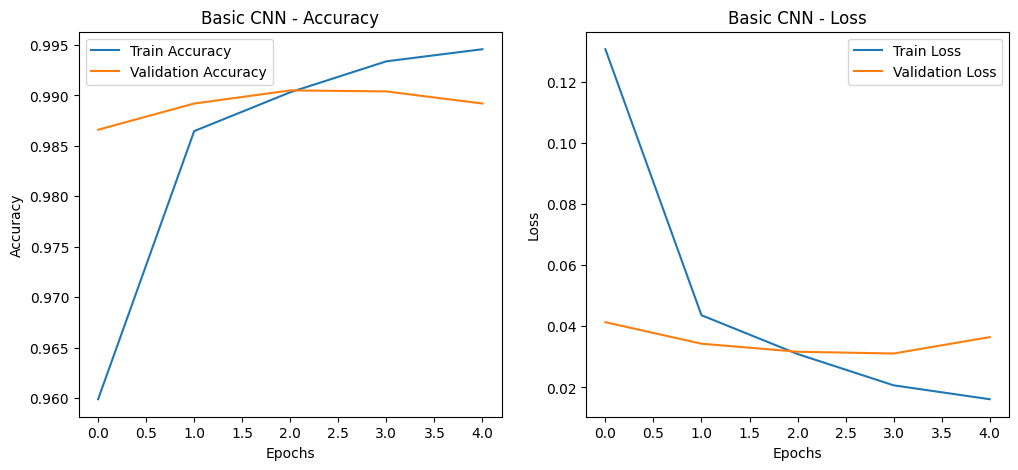

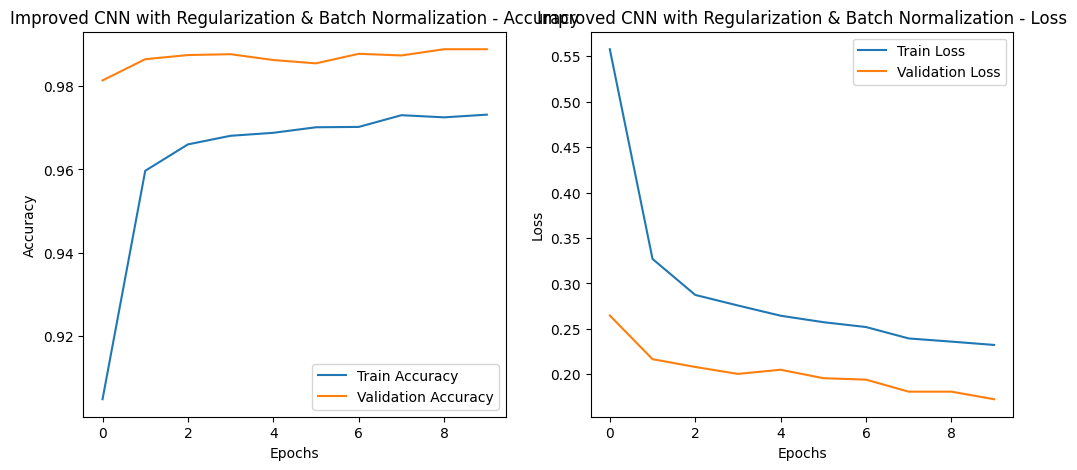

In [11]:
plot_curves(basic_history, 'Basic CNN')
plot_curves(improved_history, 'Improved CNN with Regularization & Batch Normalization')